## Metroplis sampling from a distribution 
study group tutorial 16jan19 / jplewis

In [1]:
using Distributions

In [2]:
# the distribution to sample from
beta = Distributions.Beta(5.,2.)
function prob(a) 
    return Distributions.pdf(beta, a)
end
probmin,probmax = (0.,1.)

(0.0, 1.0)

In [12]:
function mcmc1(a,explore)

    clamp(a,lo,hi) = a < lo ? lo : a > hi ? hi : a	# think not necessary

    proba = prob(a)
    for mciter = 1:100
        # note the scale makes a big difference.  too big and it spends too much time sampling the tails,
        # the histogram is not high enough near the mode.
        a_ = a + explore * randn()		# todo switch to heavy-tailed/t distribution
        a = clamp(a,probmin,probmax)
        p = prob(a_) / proba
        if (rand() < p)
            return a_
        end
    end
    return a
end

mcmc1 (generic function with 2 methods)

In [13]:

function burnin(A,explore=0.01)
    for i=1:10000
        A = mcmc1(A,explore)
    end
    A
end    

function mcmc(A,samples,explore=0.01)
    nsamples = length(samples)
    for i=1:nsamples
        A = mcmc1(A,explore)
        samples[i] = A
    end
    A
end

mcmc (generic function with 2 methods)

In [5]:
Nsamples = 1000000
Samples = Array{Float64}(undef,Nsamples)

s = 1.0
s = burnin(s)
s = mcmc(s,Samples)
#Samples = Samples / sum(Samples)

0.8426120019130698

In [14]:

using PyPlot
p_ = PyPlot
p_.clf()

# plot the true distribution, !scaled to match the histogram
npts = 100
y = zeros(npts)
x = range(0., stop=1., length=npts)
for i=1:npts
    y[i] = Distributions.pdf(beta,x[i])
end
#p_.plot(x,y,"k-")		# scale height of curve to match

# plot the histogram
#p_.plt[:hist](Samples, bins="auto")

In [9]:

function mkhist(samples, npts)
    hist = zeros(npts)
    nsamples = length(samples)
    themin = minimum(samples)
    themax = maximum(samples)
    scale = (npts-0.01) / (themax - themin)
    for i=1:nsamples
        s = samples[i]
        s = scale * (s - themin)
        @assert s >= 0. && s <= npts
        idx = floor(Int,s)
        @assert idx >= 0 && idx < npts
        idx = idx + 1
        hist[idx] = hist[idx]+1
    end
    hist = hist ./ sum(hist)
    x = range(themin, stop=themax, length=npts)
    return (x,hist)
end

mkhist (generic function with 1 method)

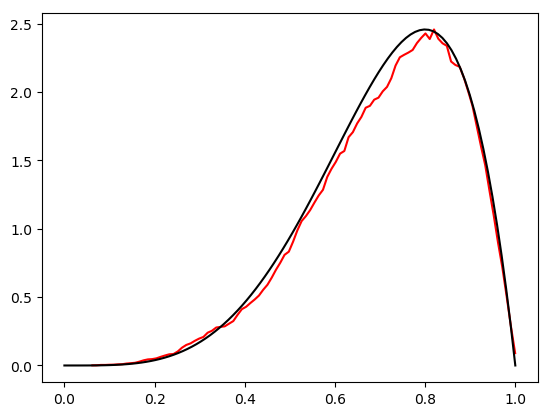

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12c707d68>

In [10]:
xh,hist = mkhist(Samples,npts)
hscale = maximum(y)/maximum(hist)
p_.plot(xh,hscale .* hist,"r-")
p_.plot(x,y,"k-")		# scale height of curve to match

### depends heavily on exploration parameter!

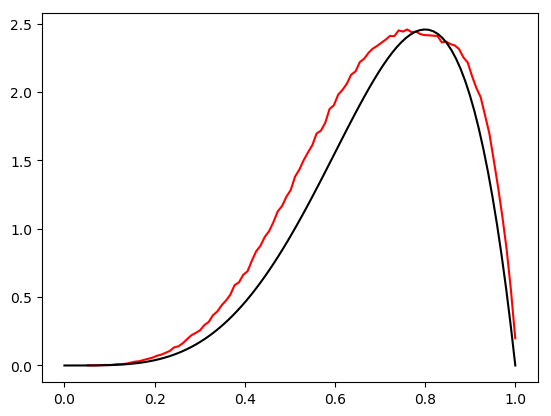

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142da83c8>

In [16]:
s = 1.0
s = burnin(s)
s = mcmc(s,Samples,0.5)

xh,hist = mkhist(Samples,npts)
hscale = maximum(y)/maximum(hist)
p_.plot(xh,hscale .* hist,"r-")
p_.plot(x,y,"k-")		# scale height of curve to match